In [ ]:
#Ensemble techniques means there arae more than one classifire whihc predict than more than one algorithm

# importing the libraries

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


# Overview of dataset

In [3]:
#reading and overview of dataset
ctg=pd.read_csv('F:\DATA SCIENCE\python\py\ALGORITHMS\Random Forest (ensemble)\ctg_1.csv')
ctg.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,2.722484,7.241298,3.659925,1.570085,0.003293,0.126058,46.990122,1.332785,9.84666,...,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,4.509878,1.304327
std,9.840844,3.560850,37.125309,2.847094,2.499229,0.057300,0.464361,17.192814,0.883241,18.39688,...,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,3.026883,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000,1.000000
25%,126.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,2.000000,1.000000
50%,133.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,4.000000,1.000000
75%,140.000000,4.000000,2.000000,5.000000,3.000000,0.000000,0.000000,61.000000,1.700000,11.00000,...,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,7.000000,1.000000
max,160.000000,26.000000,564.000000,23.000000,16.000000,1.000000,4.000000,87.000000,7.000000,91.00000,...,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,10.000000,3.000000


In [4]:
ctg.shape
ctg.head

<bound method NDFrame.head of        LB  AC  FM  UC  DL  DS  DP  ASTV  MSTV  ALTV  ...  Max  Nmax  Nzeros  \
0     120   0   0   0   0   0   0    73   0.5    43  ...  126     2       0   
1     132   4   0   4   2   0   0    17   2.1     0  ...  198     6       1   
2     133   2   0   5   2   0   0    16   2.1     0  ...  198     5       1   
3     134   2   0   6   2   0   0    16   2.4     0  ...  170    11       0   
4     132   4   0   5   0   0   0    16   2.4     0  ...  170     9       0   
...   ...  ..  ..  ..  ..  ..  ..   ...   ...   ...  ...  ...   ...     ...   
2121  140   0   0   6   0   0   0    79   0.2    25  ...  177     4       0   
2122  140   1   0   9   0   0   0    78   0.4    22  ...  169     6       0   
2123  140   1   0   7   0   0   0    79   0.4    20  ...  170     5       0   
2124  140   1   0   9   0   0   0    78   0.4    27  ...  169     6       0   
2125  142   1   1   5   0   0   0    74   0.4    36  ...  159     2       1   

      Mode  Mean  Med

In [5]:
ctg.dtypes

LB            int64
AC            int64
FM            int64
UC            int64
DL            int64
DS            int64
DP            int64
ASTV          int64
MSTV        float64
ALTV          int64
MLTV        float64
Width         int64
Min           int64
Max           int64
Nmax          int64
Nzeros        int64
Mode          int64
Mean          int64
Median        int64
Variance      int64
Tendency      int64
CLASS         int64
NSP           int64
dtype: object

# EDA

In [6]:
cols=list(ctg.columns)
cols.remove('NSP')
len(cols)

22

# Build the correlation plot

<Figure size 7200x7200 with 0 Axes>

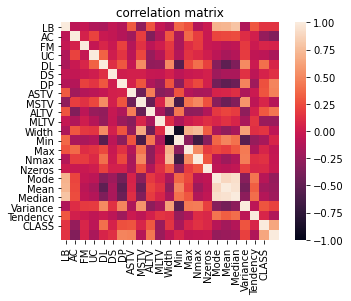

<Figure size 7200x7200 with 0 Axes>

In [31]:
cor=ctg.corr()
cor
sns.heatmap(cor,vmin=-1,vmax=1,xticklabels=cols,yticklabels=cols,
            annot=False,square=True)
plt.title('correlation matrix')
plt.figure(figsize=(100,100))
#so by the plot we get that there is correlation in LB and 
#mean , mode ,median cols.

#First we build the model as it is

# Splitting of data

In [15]:
trainx,testx,trainy,testy=train_test_split(ctg.drop('NSP',axis=1),
                                                    ctg.NSP,
                                                    test_size=0.3)

In [16]:
print('trainx={},trainy={},testx={},testy={}'.format(trainx.shape,
                                                      trainy.shape,
                                                      testx.shape,
                                                      testy.shape))

trainx=(1488, 22),trainy=(1488,),testx=(638, 22),testy=(638,)


# Model building

In [17]:
m1=RandomForestClassifier().fit(trainx,trainy)
p1=m1.predict(testx)

#Accuracy

In [58]:
AC_base=accuracy_score(testy, p1)

# Confucion matrix


#So we used Cross tab for interpretation
#its not easy to inturpret confusion mat od RF

In [19]:
df1=pd.DataFrame({'actual':testy,'predicted':p1})
pd.crosstab(df1.actual, df1.predicted,margins=True)

predicted,1,2,3,All
actual,,,,
1,487,1,0,488
2,8,91,1,100
3,0,2,48,50
All,495,94,49,638


# Classification report for this

In [20]:
class_reprt=classification_report(testy, p1)
print(class_reprt)

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       488
           2       0.97      0.91      0.94       100
           3       0.98      0.96      0.97        50

    accuracy                           0.98       638
   macro avg       0.98      0.96      0.97       638
weighted avg       0.98      0.98      0.98       638



# Important features

In [21]:
score=pd.DataFrame({'features':cols,
                    'score':m1.feature_importances_})
score.sort_values('score',ascending=False,inplace=True)

Text(0.5, 1.0, 'Random Forest-important features')

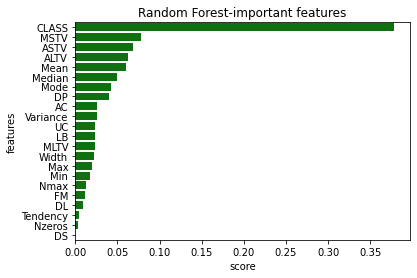

In [32]:
#score
sns.barplot(x=score.score, y=score.features,color='green')
#plt.figure(figsize=(10,10))
plt.title("Random Forest-important features")

In [33]:
#according to top 10 important feature
F_cols=ctg[['CLASS','ASTV','ALTV','MSTV','Mean','Median','Mode','AC','DP',
         'Min','Variance','MLTV','LB','UC','NSP']]
F_cols

,CLASS,ASTV,ALTV,MSTV,Mean,Median,Mode,AC,DP,Min,Variance,MLTV,LB,UC,NSP
0,9,73,43,0.5,137,121,120,0,0,62,73,2.4,120,0,2
1,6,17,0,2.1,136,140,141,4,0,68,12,10.4,132,4,1
2,6,16,0,2.1,135,138,141,2,0,68,13,13.4,133,5,1
3,6,16,0,2.4,134,137,137,2,0,53,13,23.0,134,6,1
4,2,16,0,2.4,136,138,137,4,0,53,11,19.9,132,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,5,79,25,0.2,150,152,153,0,0,137,2,7.2,140,6,2
2122,5,78,22,0.4,148,151,152,1,0,103,3,7.1,140,9,2
2123,5,79,20,0.4,148,152,153,1,0,103,4,6.1,140,7,2
2124,5,78,27,0.4,147,151,152,1,0,103,4,7.0,140,9,2


In [34]:
#spliting for new model
trainx,testx,trainy,testy=train_test_split(F_cols.drop('NSP',axis=1),
                                                    F_cols.NSP,
                                                    test_size=0.3)

In [35]:
print('trainx={},trainy={},testx={},testy={}'.format(trainx.shape,
                                                      trainy.shape,
                                                      testx.shape,
                                                      testy.shape))

trainx=(1488, 14),trainy=(1488,),testx=(638, 14),testy=(638,)


# Model accordingg to highest score of important features

In [59]:
m2=RandomForestClassifier().fit(trainx,trainy)
p2=m2.predict(testx)
AC_imp=accuracy_score(testy, p2)
#so here we got more accuracy by taking importantn features only
#so we used Cross tab for interpretation

In [60]:
AC_imp

0.9764890282131662

In [37]:
df2=pd.DataFrame({'actual':testy,'predicted':p2})
pd.crosstab(df2.actual, df2.predicted,margins=True)

predicted,1,2,3,All
actual,,,,
1,500,0,0,500
2,14,78,0,92
3,0,1,45,46
All,514,79,45,638


#Classification report for Model 2

In [38]:
class_reprtM2=classification_report(testy, p2)
print(class_reprt)

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       488
           2       0.97      0.91      0.94       100
           3       0.98      0.96      0.97        50

    accuracy                           0.98       638
   macro avg       0.98      0.96      0.97       638
weighted avg       0.98      0.98      0.98       638



# Model wiyh hyper parameter tuning

In [48]:
#m2=RandomForestClassifier(n_estimators=20,criterion='entropy',
                          #max_depth=6
                          
#Tuning Hyperparameters
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
random_search = {'criterion': ['entropy', 'gini'],
    'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
    'max_features': ['auto', 'sqrt','log2', None],
    'min_samples_leaf': [4, 6, 8, 12],
    'min_samples_split': [5, 7, 10, 14],
    'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

model = RandomForestClassifier()
model_random = RandomizedSearchCV(estimator = model, param_distributions = random_search, n_iter = 100,cv = 3, verbose= 2, random_state= 1, n_jobs = -1)
model_random.fit(trainx,trainy)

  

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 966, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 538, 'criterion': 'entropy'}
0.9885752688172044


In [61]:
print(model_random.best_score_)      

0.9885752688172044


In [63]:
#manual hypertuned model
RF4=RandomForestClassifier(n_estimators=966,min_samples_split=5,min_samples_leaf=4,max_depth=538,criterion='entropy')

In [64]:
M4=RF4.fit(trainx,trainy)

In [65]:
p4=M4.predict(testx)

In [68]:
Acc_manu=accuracy_score(testy,p4)

In [69]:
Acc_manu

0.9764890282131662

In [62]:
print(model_random.best_params_)

{'n_estimators': 966, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 538, 'criterion': 'entropy'}


In [49]:
p3=model_random.predict(testx)

In [72]:
AC_hyper=accuracy_score(testy,p3)

In [57]:
class_reportM3=classification_report(testy,p3)
print(class_reportM3)

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       500
           2       1.00      0.88      0.94        92
           3       1.00      1.00      1.00        46

    accuracy                           0.98       638
   macro avg       0.99      0.96      0.98       638
weighted avg       0.98      0.98      0.98       638



# Comparison of all thre models

In [85]:
print("accuracy of basic model=",AC_base ,"\n"
     "accuracy of Imp features model=",AC_imp,"\n"
     "accuracy of Manual hypertuned=",Acc_manu,'\n'
     "accuracy of Auto Hypertuned=",AC_hyper)

accuracy of basic model= 0.6520376175548589 
accuracy of Imp features model= 0.9764890282131662 
accuracy of Manual hypertuned= 0.9764890282131662 
accuracy of Auto Hypertuned= 0.9827586206896551
